In [10]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [11]:
# Read the dataset
file_path = "D:/Stevens/KDD/breast-cancer-wisconsin.csv"
df = pd.read_csv(file_path, header=None)

# Replace "?" with NaN and drop missing values
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df.head()



,0,1,2,3,4,5,6,7,8,9,10
0,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


In [12]:

# Define features and target variable
features = df.iloc[:, 1:-1]  # Exclude 'Sample code number' and 'Diagnosis Class'
target = df[10]  # Assuming 'Class' is the last column

# Convert features to the category data type
features = features.astype('category')

# One-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [13]:
# 6.3: Use SVM methodology
# Train an SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can try different kernels like 'linear', 'poly', 'rbf', etc.
svm_model.fit(X_train, y_train)



SVC(kernel='linear', random_state=42)

In [14]:
# Making predictions on the test set using SVM
svm_predictions = svm_model.predict(X_test)

# Evaluating the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSVM Model Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_predictions))




SVM Model Accuracy: 0.9854014598540146
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.98      0.99        93
           4       0.96      1.00      0.98        44

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



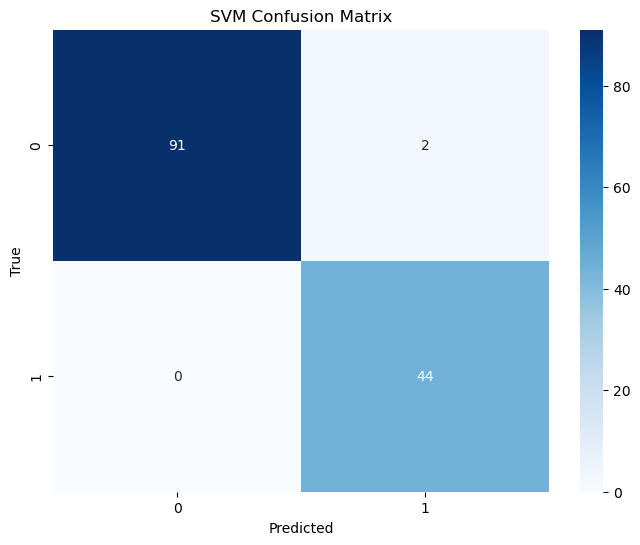

In [15]:
# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()